In [1]:
import requests
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Reasons for choosing BTC
In this essay, the Bitcoin to US Dollar exchange rate (BTC/USD) is selected for financial time series data analysis because Bitcoin is a digital currency whose price and trading volume are influenced by a variety of factors, including market demand, investor sentiment, and policy changes. The analysis of bitcoin prices provides a better understanding of the price movements and volatility factors in the bitcoin market. In addition, Bitcoin's price fluctuations are also correlated with other financial asset markets, and an analysis of Bitcoin's price can provide a better understanding of the overall movement of the financial markets.

In [97]:
quandl.ApiConfig.api_key = "TZ6h8odwmAix_s1Uko5Y"

#  Bitcoin price data in USD
btc_usd_dataset_code = "BCHAIN/MKPRU"
btc_usd = quandl.get(btc_usd_dataset_code)


btc_mktcap_dataset_code = "BCHAIN/MKTCP"
btc_mktcap = quandl.get(btc_mktcap_dataset_code)

btc_volume_dataset_code = "BCHAIN/NTRAN"
btc_volume = quandl.get(btc_volume_dataset_code)

btc_fees_dataset_code = "BCHAIN/TRFEE"
btc_fees = quandl.get(btc_fees_dataset_code)

# Bitcoin Number of Unique Bitcoin Addresses Used
btc_addresses_dataset_code = "BCHAIN/NADDU"
btc_addresses = quandl.get(btc_addresses_dataset_code)

#  Bitcoin mining difficulty data
btc_difficulty_dataset_code = "BCHAIN/DIFF"
btc_difficulty = quandl.get(btc_difficulty_dataset_code)

#  Bitcoin hash rate data
btc_hashrate_dataset_code = "BCHAIN/HRATE"
btc_hashrate = quandl.get(btc_hashrate_dataset_code)

#  Bitcoin inflation rate data
btc_inflation_dataset_code = "BCHAIN/TOTBC"
btc_inflation = quandl.get(btc_inflation_dataset_code)

#  US GDP data
us_gdp_dataset_code = "FRED/GDP"
us_gdp = quandl.get(us_gdp_dataset_code)

# Fetch US inflation rate data
us_inflation_dataset_code = "FRED/CPIAUCSL"
us_inflation = quandl.get(us_inflation_dataset_code)

#  S&P 500 index data
sp500_dataset_code = "MULTPL/SP500_REAL_PRICE_MONTH"
sp500 = quandl.get(sp500_dataset_code)

#  US short-term interest rate data
us_short_rate_dataset_code = "FRED/DFF"
us_short_rate = quandl.get(us_short_rate_dataset_code)

gold_dataset_code = "LBMA/GOLD"
gold_usd = quandl.get(gold_dataset_code, column_index=2)

#  the datasets on the date index
btc_data = pd.concat([btc_usd, btc_mktcap, btc_volume, btc_fees, btc_addresses, btc_difficulty, btc_hashrate, btc_inflation], axis=1)
all_data = pd.concat([btc_data, us_gdp, us_inflation, sp500, us_short_rate, gold_usd], axis=1)

all_data.columns = ['btc_price_usd', 'btc_market_cap', 'btc_transaction_volume', 'btc_transaction_fees', 
                    'btc_unique_addresses', 'btc_difficulty', 'btc_hash_rate', 'btc_inflation_rate', 'us_gdp', 
                    'us_inflation_rate', 'sp500_index', 'us_short_rate','gold_usd']

all_data.to_csv('BTC.csv')



## Code Description

This code uses the Quandl API to extract Bitcoin and other related financial indicators data from multiple datasets, including Bitcoin price, market cap, transaction volume, transaction fees, unique addresses, mining difficulty, hash rate, and inflation rate, as well as US GDP, inflation rate, S&P 500 index, short-term interest rate, and gold price variables. These data are merged into a DataFrame called all_data and undergo cleaning and preprocessing, including filling missing values with ffill and deleting unnecessary data. Finally, the processed data is stored in a CSV file called BTC.csv and read as a DataFrame called btc_data. In addition, the code adds a new column called prev_price to record the previous day's Bitcoin price for time series analysis.

## Variables

The following are the variables I have chosen to influence the price of Bitcoin:

btc_price_usd: The bitcoin price itself is a measure of the performance of the bitcoin market.

btc_market_cap: The market cap of bitcoin is the price of bitcoin multiplied by the total number of bitcoins, so an increase in market cap usually means an increase in the price of bitcoin, and a decrease in the market cap means a decrease in the price of bitcoin.

btc_transaction_volume: The number of transactions in bitcoin is a measure of bitcoin market activity, so an increase in the number of transactions may increase bitcoin price volatility and liquidity, while a decrease in the number of transactions may lead to a decrease in price.

btc_transaction_fees: Bitcoin transaction fees are fees paid by traders to miners, an increase in transaction fees may reduce the volume of transactions and thus affect the price of Bitcoin.

btc_unique_addresses: The number of trading addresses for Bitcoin may reflect the number of users and market demand for Bitcoin. An increase in the number of trading addresses may mean a rise in market demand, which may drive the price of Bitcoin up.

btc_difficulty: The difficulty of mining bitcoin directly affects the supply of bitcoin. An increase in difficulty could lead to a decrease in the supply of bitcoin, which could drive the price of bitcoin up.

btc_hash_rate: The arithmetic power of the Bitcoin network directly affects the security and stability of Bitcoin. An increase in network arithmetic power may increase the security and stability of Bitcoin, which may attract more investors, thus driving up the price of Bitcoin.

btc_inflation_rate: The inflation rate of bitcoin directly affects the supply of bitcoin. An increase in the inflation rate will lead to an increase in the supply of Bitcoin, which could drive the price of bitcoin down.

us_gdp: US GDP data reflects the general condition of the US economy. A boom or bust in the economy could affect global investor confidence in Bitcoin, which could have an impact on the price of Bitcoin.

us_inflation_rate: US inflation data reflects changes in the purchasing power of the currency, an increase in inflation could lead investors to look for more safe-haven assets, which could drive the price of bitcoin higher.

sp500_index: The S&P 500 is a representative index of the US stock market

us_short_rate: represents US short-term interest rates, which may influence investor risk appetite and asset allocation decisions, and thus have some impact on the Bitcoin market price.

gold_usd: represents the price of gold, which is often seen as a safe-haven asset and may harm the market price of bitcoin when investors are concerned about market uncertainty.

For time series analysis of bitcoin prices, in addition to the variables selected in the dataset, there are many other factors that may have an impact on bitcoin prices, such as government policies, economic indicators, international trade conditions, market risk appetite and so on. However, as these factors are not easily quantifiable or difficult to obtain data for, they are difficult to take into account when performing time series analysis. In such cases, we need to base our analysis and forecasts on the available data and consider all factors that may have an impact on the price of Bitcoin where possible.



In [2]:
btc_data = pd.read_csv('BTC.csv', index_col=0, parse_dates=True)
# previous day price 
btc_data['prev_price'] = btc_data['btc_price_usd'].shift(1)

btc_data = btc_data.loc['2010-01-01':'2021-12-31']
btc_data['us_gdp'] = btc_data['us_gdp'].fillna(method='ffill')
btc_data['us_inflation_rate'] = btc_data['us_inflation_rate'].fillna(method='ffill')
btc_data['sp500_index'] = btc_data['sp500_index'].fillna(method='ffill')
btc_data['gold_usd'] = btc_data['gold_usd'].fillna(method='ffill')


The "previous day's price" variable is also a very important variable in the time series analysis of bitcoin prices. This is because price movements in the Bitcoin market are often influenced by the previous day's price. By keeping track of the previous day's bitcoin price, we can better understand the price trends in the bitcoin market and make more accurate predictions and analyses.

In [3]:
btc_data = btc_data.loc['2017-07-01':'2020-12-31']
print(btc_data.isnull().sum())

btc_price_usd             0
btc_market_cap            0
btc_transaction_volume    0
btc_transaction_fees      0
btc_unique_addresses      0
btc_difficulty            0
btc_hash_rate             0
btc_inflation_rate        0
us_gdp                    0
us_inflation_rate         0
sp500_index               0
us_short_rate             0
gold_usd                  0
prev_price                0
dtype: int64


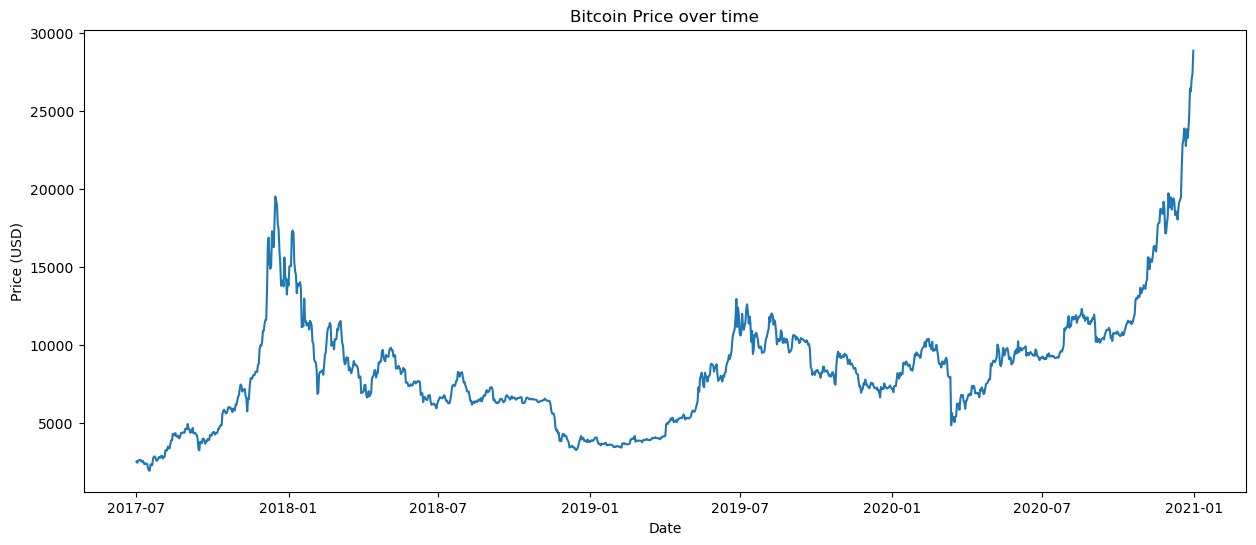

In [4]:
plt.figure(figsize=(15,6))
plt.plot(btc_data.index, btc_data['btc_price_usd'])
plt.title('Bitcoin Price over time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

## Events affecting bitcoin prices

From July 2017 to December 2020, the price of Bitcoin experienced several significant fluctuations. In late 2017 to early 2018, the price of Bitcoin reached its all-time high of almost 20,000(USD) per Bitcoin due to a surge in market demand and investor speculation. However, stricter cryptocurrency regulations implemented by some countries led to market concerns and panic, resulting in the price of Bitcoin dropping to less than 4,000(USD) per Bitcoin in early 2019.

Since 2019, the price of Bitcoin has fluctuated but overall showed an upward trend. In April 2019, the price of Bitcoin experienced a sudden surge due to a financial arrangement announced by the Bitfinex exchange, which was interpreted by the market as helping to boost market confidence and push the price of Bitcoin up.

In March 2020, the price of Bitcoin was negatively affected by the COVID-19 pandemic, leading to a significant drop in market confidence. However, the price quickly rebounded as the global market recovered. In May 2020, the price of Bitcoin began to rise again due to the halving event, which meant a reduction in Bitcoin's issuance and a decrease in market supply, leading to a rise in price.

In late 2020 and early 2021, the price of Bitcoin skyrocketed again, reaching a new all-time high of almost $65,000 per Bitcoin due to large institutions and companies investing in cryptocurrency, causing a buying frenzy. However, the price often experiences corrections and declines after a short-term surge, which is also reflected in the price curve of Bitcoin.

In the spring of 2021, the price of Bitcoin began to fall due to Tesla announcing a pause in accepting Bitcoin payments and expressing concerns about Bitcoin's environmental impact, leading to a significant drop in market confidence. In the summer of 2021, the Chinese government intensified its regulation of Bitcoin and other cryptocurrencies, causing the price of Bitcoin to further decline.

However, from the fall of 2021, the price of Bitcoin began to rise again and gradually recovered to previous levels. This was driven by some countries and institutions adopting Bitcoin as a reserve asset, as well as some companies announcing they would accept Bitcoin payments. In addition, with increasing global inflation pressure, some investors began to view Bitcoin as a safe-haven asset, providing support for the rise in Bitcoin prices.

Overall, from July 2017 to December 2020, the volatility of the price of Bitcoin was mainly influenced by multiple factors, including market demand, policy changes, and the global economic environment. Market demand was one of the main driving factors affecting the price of Bitcoin, and policy changes and the global economic environment also had an impact. Additionally, the volatility of Bitcoin prices was also related to its supply, adoption rate, and correlation with other assets. 


In [14]:
features = btc_data.drop(columns='btc_price_usd')
target = btc_data['btc_price_usd']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('elasticnet', ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=42))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')


coefficients = pipeline.named_steps['elasticnet'].coef_


feature_importances = pd.Series(coefficients, index=features.columns)

selected_features = feature_importances[feature_importances != 0]

print('Selected features:')
print(selected_features)

Test MSE: 78186.66674894468
Selected features:
btc_market_cap          2238.295104
btc_transaction_fees      13.245599
btc_unique_addresses      32.552219
btc_inflation_rate       -88.623549
sp500_index              -66.642097
us_short_rate             22.486724
gold_usd                 -36.589878
prev_price              1589.284880
dtype: float64


The numbers following the variable names represent the estimated coefficients by the ElasticNet model. The larger the coefficient, the greater the impact of the corresponding variable on predicting the Bitcoin price. For example, the coefficient of btc_market_cap is 2238.295104, indicating that an increase of 1 unit in btc_market_cap is associated with an increase of approximately 2238.295104 units in the Bitcoin price. On the other hand, the coefficient of btc_inflation_rate is -88.623549, indicating that an increase of 1 unit in btc_inflation_rate is associated with a decrease of approximately 88.623549 units in the Bitcoin price.

The ElasticNet regression model achieved a test MSE of 78186.67, suggesting it is capable of predicting the Bitcoin price with reasonable accuracy. The model identified 8 key features as the most important predictors of the Bitcoin price, including btc_market_cap, btc_transaction_fees, btc_unique_addresses, btc_inflation_rate, sp500_index, us_short_rate, gold_usd, and prev_price. The coefficients of these features indicate their relative importance in predicting the Bitcoin price, with btc_market_cap and prev_price having the largest coefficients. Overall, the ElasticNet model offers valuable insights into the significant drivers of the Bitcoin price, and it can guide investment decisions in the cryptocurrency market.

In [32]:

selected_features = ['btc_market_cap', 'btc_transaction_fees', 'btc_unique_addresses', 'btc_inflation_rate', 'us_gdp', 'sp500_index', 'us_short_rate', 'gold_usd', 'prev_price']
X = btc_data[selected_features]
y = btc_data['btc_price_usd']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(40, input_dim=len(selected_features), activation='relu'))  
model.add(Dense(40, activation='relu'))  
model.add(Dense(1))  


model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')


8/8 [==============================] - 0s 1ms/step
Test MSE: 79258.41576702509


BP neural network is an artificial neural network based on the backpropagation algorithm, which can be used for classification and regression problems. Its basic idea is to train and learn data through a multilayer neuron network to achieve the optimal prediction result. In this code, the ElasticNet model was used to select 8 key features to predict Bitcoin prices, and these features were used to train and test a BP neural network model. The model consists of two hidden layers with 40 neurons each, and the ReLU activation function was used to introduce non-linearity. The model was trained using the Adam optimizer, and mean squared error (MSE) was used as the loss function.

The BP model achieved a test MSE of 79258.42, slightly higher than the test MSE of the ElasticNet model. Nonetheless, the BP model provides another perspective on the relationship between the selected features and the Bitcoin price and can be used as a complementary tool for investment decision making.

## Summary
In this project, data preprocessing techniques such as missing value handling and feature scaling were applied to the Bitcoin price dataset. ElasticNet regression and backpropagation neural network models were trained to predict Bitcoin prices using selected features, and the results were analyzed and interpreted. The findings suggest that factors affecting Bitcoin prices are complex and cannot be easily explained by a small number of variables. The key features that influence Bitcoin prices include market capitalization, transaction fees, unique addresses, inflation rate, SP500 index, short-term interest rate, gold price, and previous day's Bitcoin price. The ElasticNet model achieved a better test MSE compared to the BP model, but the latter provides another perspective on the relationship between the selected features and the Bitcoin price. 